In [6]:
## Creating XML

import os
import natsort
import glob
import cv2
import numpy as np
from scipy import io

from xml.etree.ElementTree import Element, SubElement, ElementTree
from math import *
import time

## Checking XML

from xml.etree.ElementTree import parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import os
import torch

##  Data Analysis
from xml.etree.ElementTree import parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import os

In [59]:
## Creating XML
targetDirs = ['afw','helen', 'ibug', 'lfpw', '01_Indoor', '02_Outdoor']
#targetDirs = ['afw']
root = Element('dataset')
images = SubElement(root, 'images')

start_time = time.time()
for i in range(len(targetDirs)) :
    targetDir = targetDirs[i]

    imgs_dir = './300W/' + targetDir + '/*.jpg'
    if targetDir == 'lfpw' or targetDir == '01_Indoor' or targetDir == '02_Outdoor':
        imgs_dir = imgs_dir = './300W/' + targetDir + '/*.png'
    
    imgs = glob.glob(imgs_dir)
    imgs = natsort.natsorted(imgs)
    ptss_dir = './300W/'+ targetDir + '/*.pts'
    ptss = glob.glob(ptss_dir)
    ptss = natsort.natsorted(ptss)
    
    net = cv2.dnn.readNetFromCaffe('./openCV_models/deploy.prototxt.txt',
                               './openCV_models/res10_300x300_ssd_iter_140000.caffemodel')
    cnt=0
    for i in range(len(imgs)) :
        img = cv2.imread(imgs[i], 1)
        (h, w) = img.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        
        pts = np.loadtxt(ptss[i], comments=("version:", "n_points:", "{", "}"))
        for j in range(0, detections.shape[2]):
            box = detections[0, 0, j, 3:7] * np.array([w, h, w, h])

            (l, t, r, b) = box.astype("int")

            # Check whether it is the same face for OpenCV & groundtruth
            x1, y1 = int(pts[36][0]), int(pts[36][1]) # left eye's left edge
            x2, y2 = int(pts[45][0]), int(pts[45][1]) # right eye's right edge
            Xwidth = int(max(pts[:, 0]) - min(pts[:, 0]))
            Yheight = int(max(pts[:, 1]) - min(pts[:, 1]))
            if((x1<l) or(x2>r)) :
                continue
            if((y1<t) or (y1>b))and((y2<t) or (y2>b)) :
                continue
            if Xwidth*1.2<(r-l) or Yheight*2<(b-t):
                #print(targetDir+'/'+imgs[i].split('\\')[-1])
                continue
                
            image = SubElement(images, 'image')
            img_name = imgs[i].split('\\')[-1]
            image.attrib['file'] = targetDir + '/' + img_name
            box = SubElement(image, 'box')
            box.attrib['top'] = str(t)
            box.attrib['left'] = str(l)
            box.attrib['width'] = str(r-l)
            box.attrib['height'] = str(b-t)

            for k in range(68) :
                part = SubElement(box, 'part')
                part.attrib['name'] = str(k).zfill(2)
                part.attrib['x'] = str(int(pts[k, 0]))
                part.attrib['y'] = str(int(pts[k, 1]))
            cnt += 1
            break
            
    print(str(len(imgs)) + ' of ' + targetDir +' : ' + str(time.time() - start_time))
    print(str(len(imgs)-cnt) + ' images are omitted')
    
filename = 'labels_300W_new_1' # 300w's 600 images added at 4 existing dataset
tree = ElementTree(root)
tree.write('./300W/' + filename + '.xml')

337 of afw : 17.05281972885132
14 images are omitted
2330 of helen : 125.3592140674591
10 images are omitted
135 of ibug : 129.76651048660278
6 images are omitted
1035 of lfpw : 159.66776371002197
1 images are omitted


In [81]:
## Checking XML

xml_dir = './300W/labels_300W_new_1.xml'
tree = parse(xml_dir)
root = tree.getroot()

image_filenames = []
landmarks = []
crops = []
root_dir = './300W'
for filename in root[0]:
    image_filenames.append(os.path.join(root_dir, filename.attrib['file']))

    crops.append(filename[0].attrib)

    landmark = []
    for num in range(68):
        x_coordinate = int(filename[0][num].attrib['x'])
        y_coordinate = int(filename[0][num].attrib['y'])
        landmark.append([x_coordinate, y_coordinate])
    landmarks.append(landmark)

    
landmarks = np.array(landmarks).astype('int')

In [82]:
print(landmarks.shape)

(4402, 68, 2)


./300W\afw/2086996835_6.jpg
./300W\afw/4174638819_1.jpg
./300W\afw/2805422179_1.jpg
./300W\afw/448291547_1.jpg
./300W\afw/79378097_2.jpg
./300W\afw/3729198156_2.jpg
./300W\afw/5002723411_3.jpg
./300W\afw/3662810723_1.jpg
./300W\helen/2613987958_1.jpg
./300W\helen/194136419_1.jpg
./300W\helen/2493621535_1.jpg
./300W\helen/2211065399_1.jpg
./300W\helen/3223115234_1.jpg
./300W\helen/2854289847_1.jpg
./300W\helen/203328057_1.jpg
./300W\helen/2906680022_1.jpg
./300W\ibug/image_053.jpg
./300W\ibug/image_006.jpg
./300W\ibug/image_105_01.jpg
./300W\ibug/image_021_1.jpg
./300W\ibug/image_015_1.jpg
./300W\ibug/image_095.jpg
./300W\ibug/image_021_1.jpg
./300W\ibug/image_081.jpg
./300W\lfpw/image_0301.png
./300W\lfpw/image_0790.png
./300W\lfpw/image_0255.png
./300W\lfpw/image_0374.png
./300W\lfpw/image_0789.png
./300W\lfpw/image_0409.png
./300W\lfpw/image_0128.png
./300W\lfpw/image_0767.png
./300W\01_Indoor/indoor_215.png
./300W\01_Indoor/indoor_120.png
./300W\01_Indoor/indoor_286.png
./300W\01_In

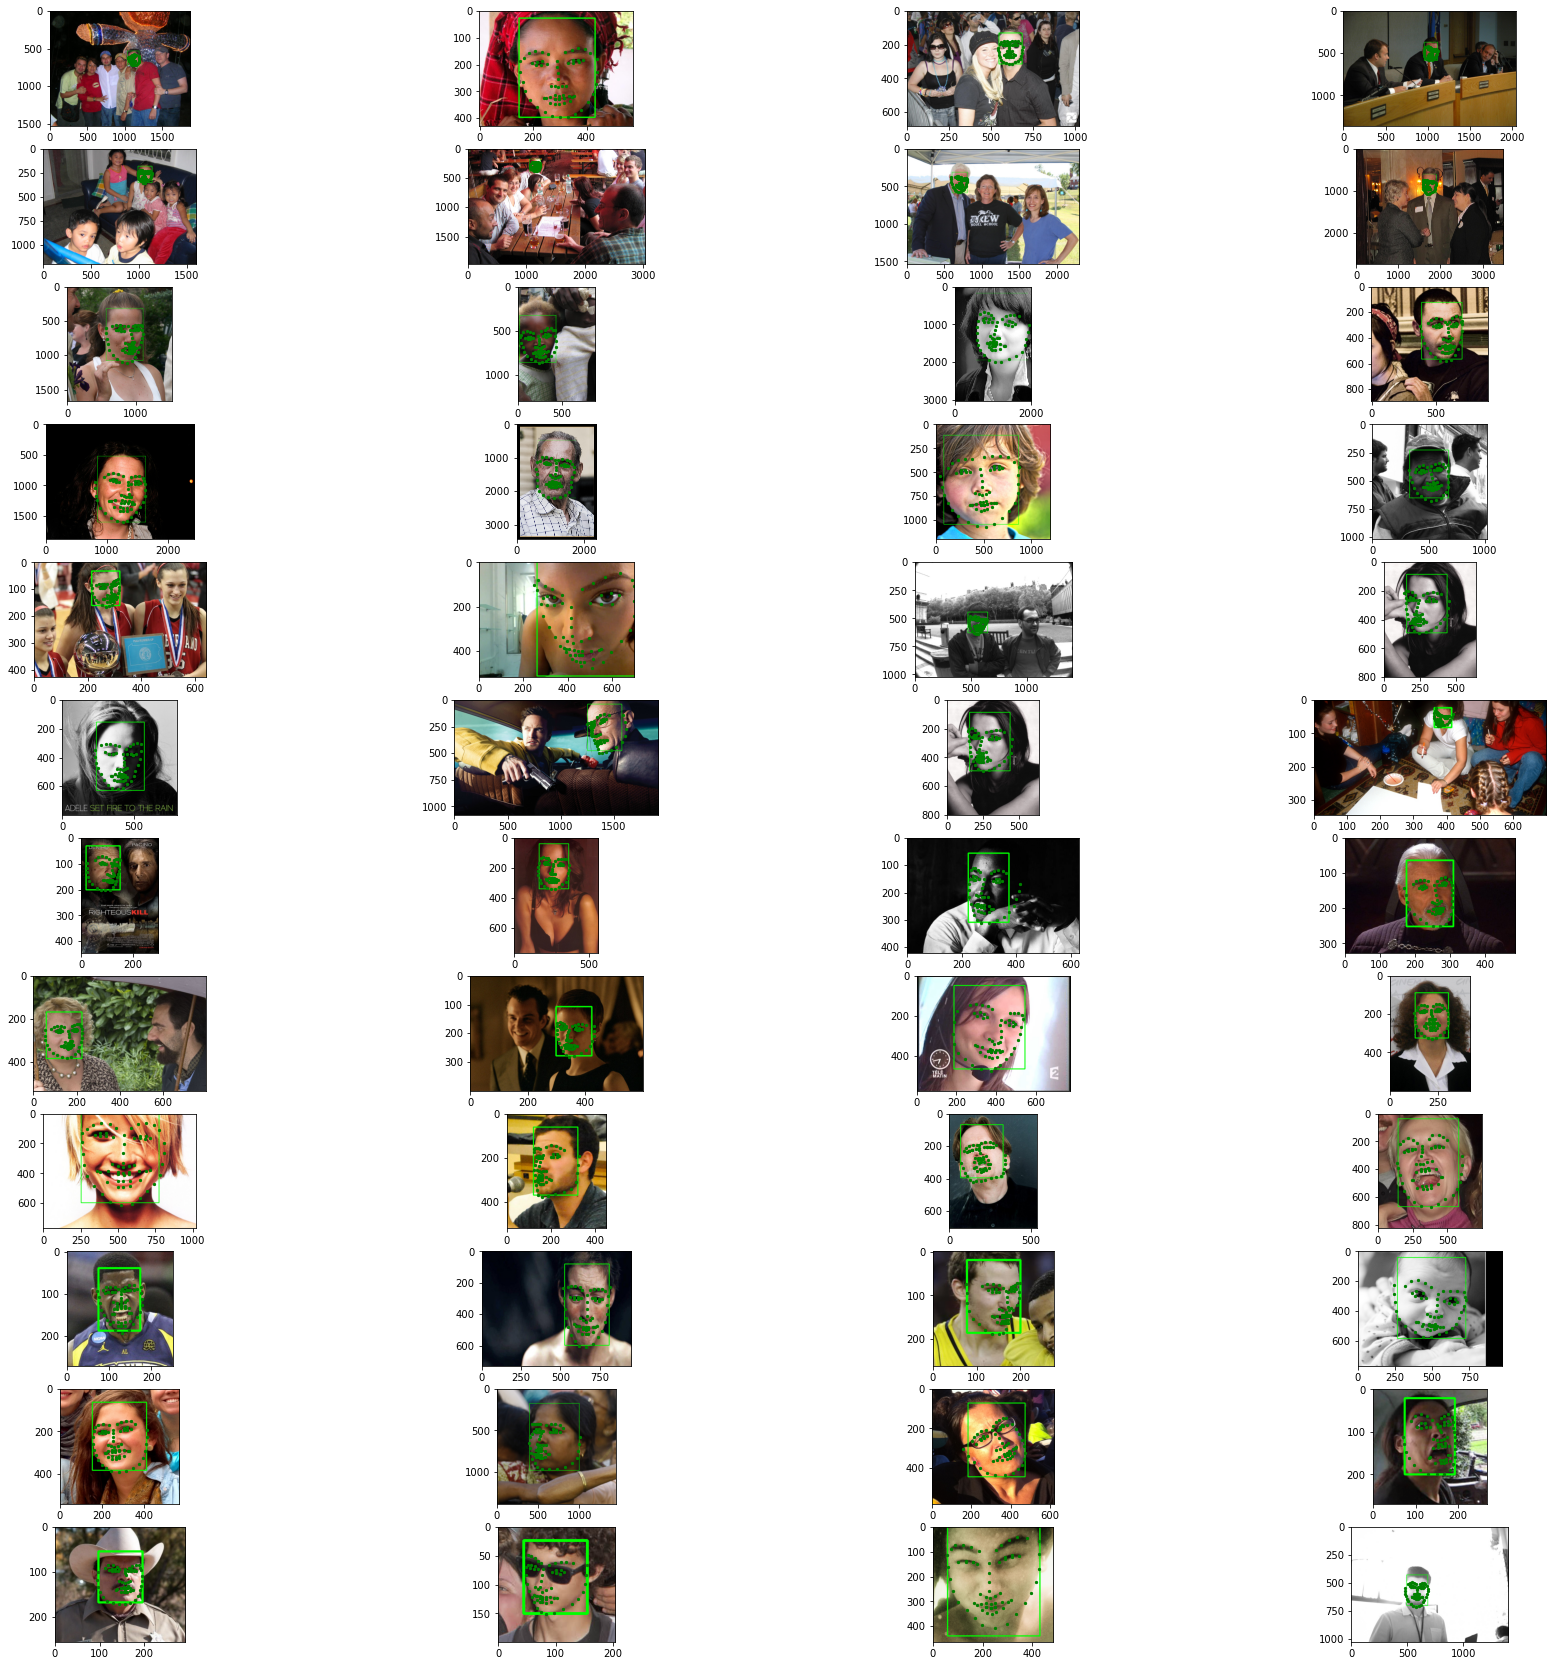

In [83]:
# image and landmarks' accordance
targetDirs = ['afw','helen', 'ibug', 'lfpw', '01_Indoor', '02_Outdoor']
#targetDirs = ['afw']
j = 0;
count = 0;
counts = [];
for i in range(len(image_filenames)) :
    if(image_filenames[i].split('\\')[1].split('/')[0] == targetDirs[j]):
        count = count + 1
    else :
        counts.insert(j,count)
        j = j + 1
        count = 0
counts.insert(j,count)

plt.figure(figsize=(30, 30))

for i in range(48) :
    j = floor(i/8)
    if floor(i/8)==0 :
        x = random.randint(0,np.sum(counts[0:1])-1)
    else :
        x = random.randint(np.sum(counts[0:floor(i/8)]),np.sum(counts[0:floor(i/8)+1])-1)
      
    image = cv2.imread(image_filenames[x], 1) # OpenCV use BGR, Matplotlib uses RGB
    bg_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.figure(figsize=(10, 10))
    plt.subplot(12,4,i+1)
    plt.scatter(landmarks[x, : , 0], landmarks[x, : , 1], s = 5, c = 'g')
    cv2.rectangle(bg_image, (int(crops[x]['left']), int(crops[x]['top'])), 
                  (int(crops[x]['left']) + int(crops[x]['width']), int(crops[x]['top']) + int(crops[x]['height'])),(0, 255, 0), 4)
    plt.imshow(bg_image);
    print(image_filenames[x])

In [84]:
#duplication check     
arr = set(image_filenames)
print(str(len(arr)) + ' from ' + str(len(image_filenames)))

4402 from 4402


In [85]:
# in search of images with closed eyes
vals_raw = []
vals = []
for i in range(len(image_filenames)) :
    y_l = landmarks[i][37][1], landmarks[i][41][1], landmarks[i][38][1], landmarks[i][40][1]  # left eye
    y_r = landmarks[i][43][1], landmarks[i][47][1], landmarks[i][44][1], landmarks[i][46][1]  # right eye
    y_n = landmarks[i][33][1], landmarks[i][51][1] # nose tip to top of mouth
    avg = 0
    for j in range(2) :
        avg = avg - y_l[2*j] + y_l[2*j+1] - y_r[2*j] + y_r[2*j+1]
    avg = avg/4
    vals_raw.insert(i, avg)
    nom = (-y_n[0]+y_n[1])
    if nom == 0 :
        nom = 1;
    val = avg/nom
    vals.insert(i,val)
vals.sort()

In [88]:
for i in range(len(image_filenames)) :
    y_l = landmarks[i][37][1], landmarks[i][41][1], landmarks[i][38][1], landmarks[i][40][1]  # left eye
    y_r = landmarks[i][43][1], landmarks[i][47][1], landmarks[i][44][1], landmarks[i][46][1]  # right eye
    y_n = landmarks[i][33][1], landmarks[i][51][1] # nose tip to top of mouth
    avg = 0
    for j in range(2) :
        avg = avg - y_l[2*j] + y_l[2*j+1] - y_r[2*j] + y_r[2*j+1]
    avg = avg/4
    nom = (-y_n[0]+y_n[1])
    if nom == 0 :
        nom = 1;
    val = avg/nom
    if val < vals[100]:
        print(image_filenames[i] + ', : ' + str(val))

./300W\afw/815038_2.jpg, : 0.08333333333333333
./300W\afw/47618649_1.jpg, : 0.0
./300W\afw/91328372_1.jpg, : 0.0
./300W\afw/448291547_2.jpg, : 0.0
./300W\afw/955659370_2.jpg, : 0.0
./300W\afw/2099639490_2.jpg, : -0.0
./300W\afw/2437602091_1.jpg, : 0.0
./300W\afw/2863107962_3.jpg, : 0.0
./300W\afw/4337161543_1.jpg, : 0.0
./300W\afw/4538917191_4.jpg, : 0.09090909090909091
./300W\afw/4880083461_1.jpg, : 0.037037037037037035
./300W\afw/4970182488_1.jpg, : 0.03125
./300W\helen/11329920_1.jpg, : 0.0
./300W\helen/23739520_1.jpg, : 0.07
./300W\helen/106242334_1.jpg, : 0.0
./300W\helen/126229661_1.jpg, : -0.005813953488372093
./300W\helen/145548320_1.jpg, : 0.0297029702970297
./300W\helen/164403300_1.jpg, : 0.00819672131147541
./300W\helen/180986261_1.jpg, : -0.01
./300W\helen/193929298_1.jpg, : 0.0
./300W\helen/210422851_1.jpg, : 0.0
./300W\helen/1012675629_1.jpg, : 0.0
./300W\helen/1012675629_2.jpg, : -0.125
./300W\helen/1408008592_1.jpg, : -0.012295081967213115
./300W\helen/1525918600_1.jpg,

In [92]:
cnt = 0
for i in range(len(image_filenames)) : 
    cnt += 1
    if vals[i] >= 0.2:
        print(str(cnt) + ' of ' + str(len(image_filenames)) +' images seems to have closed eyes')
        break


149 of 4402 images seems to have closed eyes
